In [ ]:
# Import required libraries and dependencies
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving crypto_market_data.csv to crypto_market_data (2).csv


In [ ]:
file_name = list(uploaded.keys())[0]

In [ ]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display Sample Data

market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [ ]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [ ]:
print(market_data_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [ ]:
print(market_data_df.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h", "price_change_percentage_7d",
       "price_change_percentage_14d", "price_change_percentage_30d",
       "price_change_percentage_60d", "price_change_percentage_200d",
       "price_change_percentage_1y",]])

In [ ]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_data_scaled,

    columns=["price_change_percentage_24h", "price_change_percentage_7d",
"price_change_percentage_14d", "price_change_percentage_30d",
       "price_change_percentage_60d", "price_change_percentage_200d",
       "price_change_percentage_1y",]
)



# Copy the crypto names from the original data

# Set the coinid column as index
df_market_scaled["coin_id"] = market_data_df.index

df_market_scaled = df_market_scaled.set_index("coin_id")

# Display sample data
df_market_scaled.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for i in k:
  model = KMeans(n_clusters=i, n_init='auto', random_state=1)
  model.fit(df_market_scaled)
  inertia.append(model.inertia_)
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

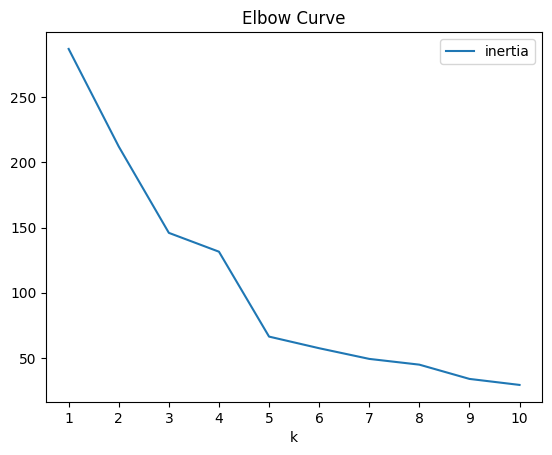

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                  y="inertia",
                  title="Elbow Curve",
                  xticks=k)

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**
Visually it appears that the best value for k is 5.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5, n_init='auto', random_state=1)

In [ ]:
# Fit the K-Means model using the scaled data
model.fit(df_market_scaled)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
model_clusters = model.predict(df_market_scaled)

# View the resulting array of cluster values.
print(model_clusters)

[1 1 2 2 1 1 1 1 1 2 0 2 2 1 2 2 2 2 1 2 0 1 2 2 2 2 2 0 1 2 2 2 3 2 0 0 4
 0 2 2 0]


In [ ]:
# Create a copy of the DataFrame
model_predictions = df_market_scaled.copy()

In [ ]:
# Add a new column to the DataFrame with the predicted clusters
model_predictions['model_clusters'] = model_clusters

# Display sample data
model_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,model_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Scatter Plot'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

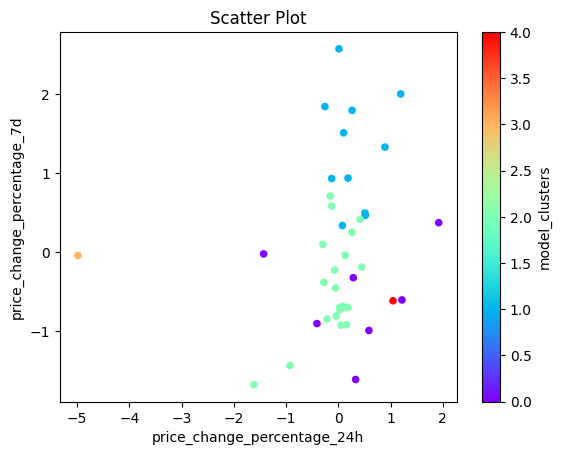

In [ ]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
model_predictions.plot.scatter(
x="price_change_percentage_24h",
y="price_change_percentage_7d",
c="model_clusters",
title = "Scatter Plot",
colormap='rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [ ]:
 #Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca = PCA(n_components=3)

pca.fit(df_market_scaled)


dfmarket_pca = pca.transform(df_market_scaled)
# View the first five rows of the DataFrame.
dfmarket_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_pca_df = pd.DataFrame(
    dfmarket_pca,
    columns=["PCA1", "PCA2", "PCA3"]

)
market_pca_df["coin_id"] = market_data_df.index
market_pca_df.set_index("coin_id", inplace=True)

# Set the coinid column as index


# Display sample data
market_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop
# 1. Create a KMeans model using the loop counter for the n_clusters


# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
  k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
  k_model.fit(market_data_df)
  inertia.append(k_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.658120e+05
5,6,3.431060e+05
6,7,2.121608e+05
7,8,1.744806e+05
8,9,1.549583e+05
9,10,1.121041e+05


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

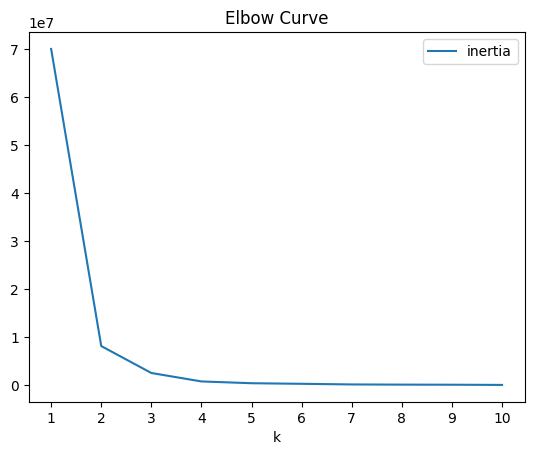

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  The best value for k is 3



* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  Yes, it is less than the best  k value of the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, n_init='auto', random_state=3)

In [ ]:
# Fit the K-Means model using the PCA data
model.fit(market_data_df)

KMeans(n_clusters=3, n_init='auto', random_state=3)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data

kmeans_predictions = model.predict(market_data_df)
# Print the resulting array of cluster values.
print(kmeans_predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [ ]:
# Create a copy of the DataFrame with the PCA data
df_market_predictions = market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

df_market_predictions["kmeans_segments"] = model.predict(market_data_df)

# Display sample data
display(df_market_predictions)

,PCA1,PCA2,PCA3,kmeans_segments
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [ ]:
df_market_predictions.columns

Index(['PCA1', 'PCA2', 'PCA3', 'kmeans_segments'], dtype='object')

NameError: name 'plt' is not defined

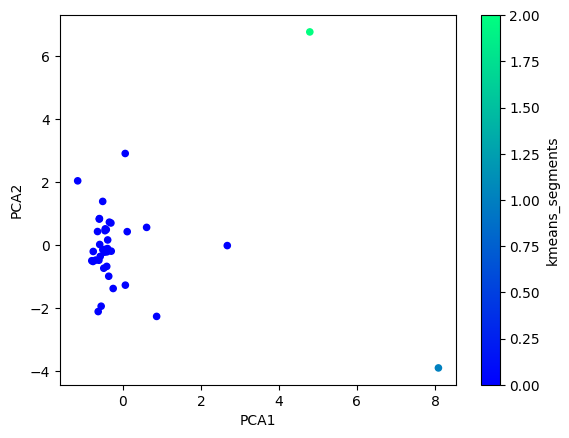

In [ ]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
df_market_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="kmeans_segments",
    colormap="winter"
)

plt.show()

In [ ]:
market_pca_data = pca.fit_transform(market_data_df)

loadings = pca.components_

print(loadings)

[[-1.52136224e-03 -1.96604406e-04 -7.05210679e-04  9.55081093e-04
   8.79488346e-03  3.00266475e-01  9.53812839e-01]
 [ 3.93266419e-03 -1.28866398e-03  6.57662271e-03  8.79608422e-02
   1.58367096e-01  9.37598885e-01 -2.96699691e-01]
 [ 1.39380115e-02 -1.64620357e-02  1.26843921e-01  3.77658899e-01
   8.99180628e-01 -1.73684276e-01  4.61202656e-02]]


### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
    PCA2 shows more postive influence on each component.